# Trực quan hóa dữ liệu về giá nhà

## 1. Chuẩn bị dữ liệu cho trực quan hóa dữ liệu

### Import thư viện và nạp dữ liệu

In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

houseprices_data = pd.read_csv("HousingPrices-Amsterdam-August-2021.csv")
houseprices_data = houseprices_data[['Zip', 'Price', 'Area', 'Room']]
display(houseprices_data.head(5))

Zip     Price  Area  Room
0  1091 CR  685000.0    64     3
1  1059 EL  475000.0    60     3
2  1097 SM  850000.0   109     4
3  1060 TH  580000.0   128     6
4  1036 KN  720000.0   138     5

### Tạo cột "PriceperSqm" dựa vào biến "Price" và "Area"

Giá mỗi mét vuông được tính bằng công thức:  

$\text{PriceperSqm} = \frac{\text{Price}}{\text{Area}}$.

Trong đó:
- **Price**: giá bán của căn nhà 
- **Area**: diện tích của căn nhà  
- **PriceperSqm**: giá trung bình cho mỗi mét vuông 


In [14]:
houseprices_data['PriceperSqm'] = houseprices_data['Price'] / houseprices_data['Area']
display(houseprices_data.head(5))

Zip     Price  Area  Room   PriceperSqm
0  1091 CR  685000.0    64     3  10703.125000
1  1059 EL  475000.0    60     3   7916.666667
2  1097 SM  850000.0   109     4   7798.165138
3  1060 TH  580000.0   128     6   4531.250000
4  1036 KN  720000.0   138     5   5217.391304

## 2. Trực quan hóa dữ liệu với thư viện Matplotlib
Sắp xếp data theo cột Price giảm dần (giá cao nhất lên đầu).

In [15]:
houseprices_sorted = houseprices_data.sort_values('Price', ascending = False)
houseprices_sorted.head()

Zip      Price  Area  Room   PriceperSqm
195  1017 EL  5950000.0   394    10  15101.522843
837  1075 AH  5850000.0   480    14  12187.500000
305  1016 AE  4900000.0   623    13   7865.168539
103  1017 ZP  4550000.0   497    13   9154.929577
179  1012 JS  4495000.0   178     5  25252.808989

### Case 1: Cơ bản
Tạo figure kích thước 12×6 inch, lấy 10 Zip code đầu và 10 giá tương ứng, rồi vẽ bar chart

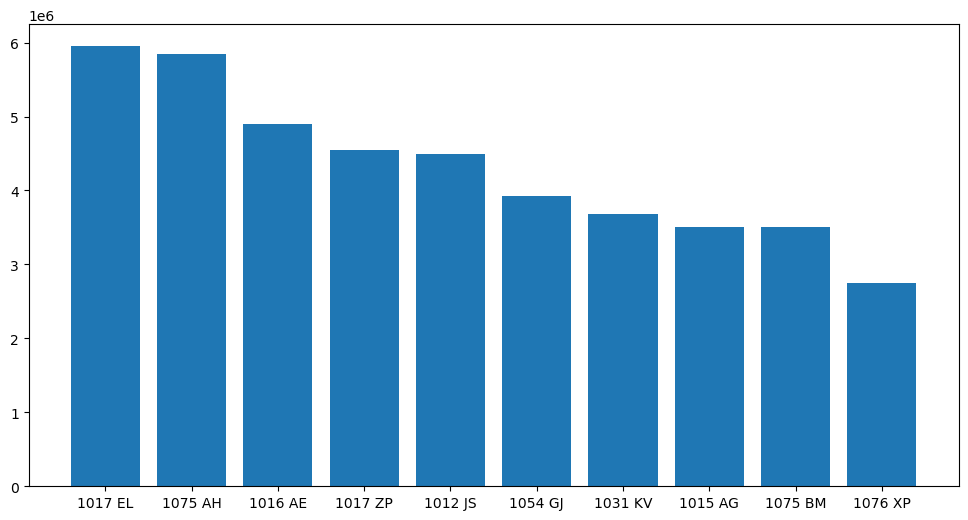

In [16]:
plt.figure(figsize=(12,6))
x = houseprices_sorted['Zip'][0:10]
y = houseprices_sorted['Price'][0:10] 
plt.bar(x,y)
plt.show()

### Case 2: Thêm tiêu đề, nhãn trục, và điều chỉnh kích cỡ chữ.

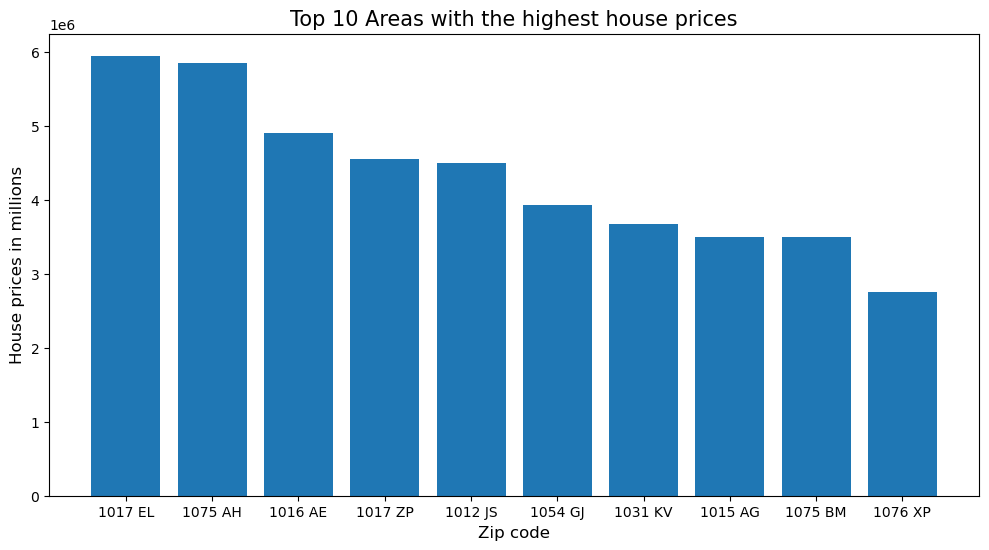

In [17]:
plt.figure(figsize= (12,6))
plt.bar(x,y)
plt.title('Top 10 Areas with the highest house prices', fontsize=15)
plt.xlabel('Zip code', fontsize = 12)
plt.xticks(fontsize=10)
plt.ylabel('House prices in millions', fontsize=12)
plt.yticks(fontsize=10)
plt.show()

### Case 3: So sánh Price và PriceperSqm

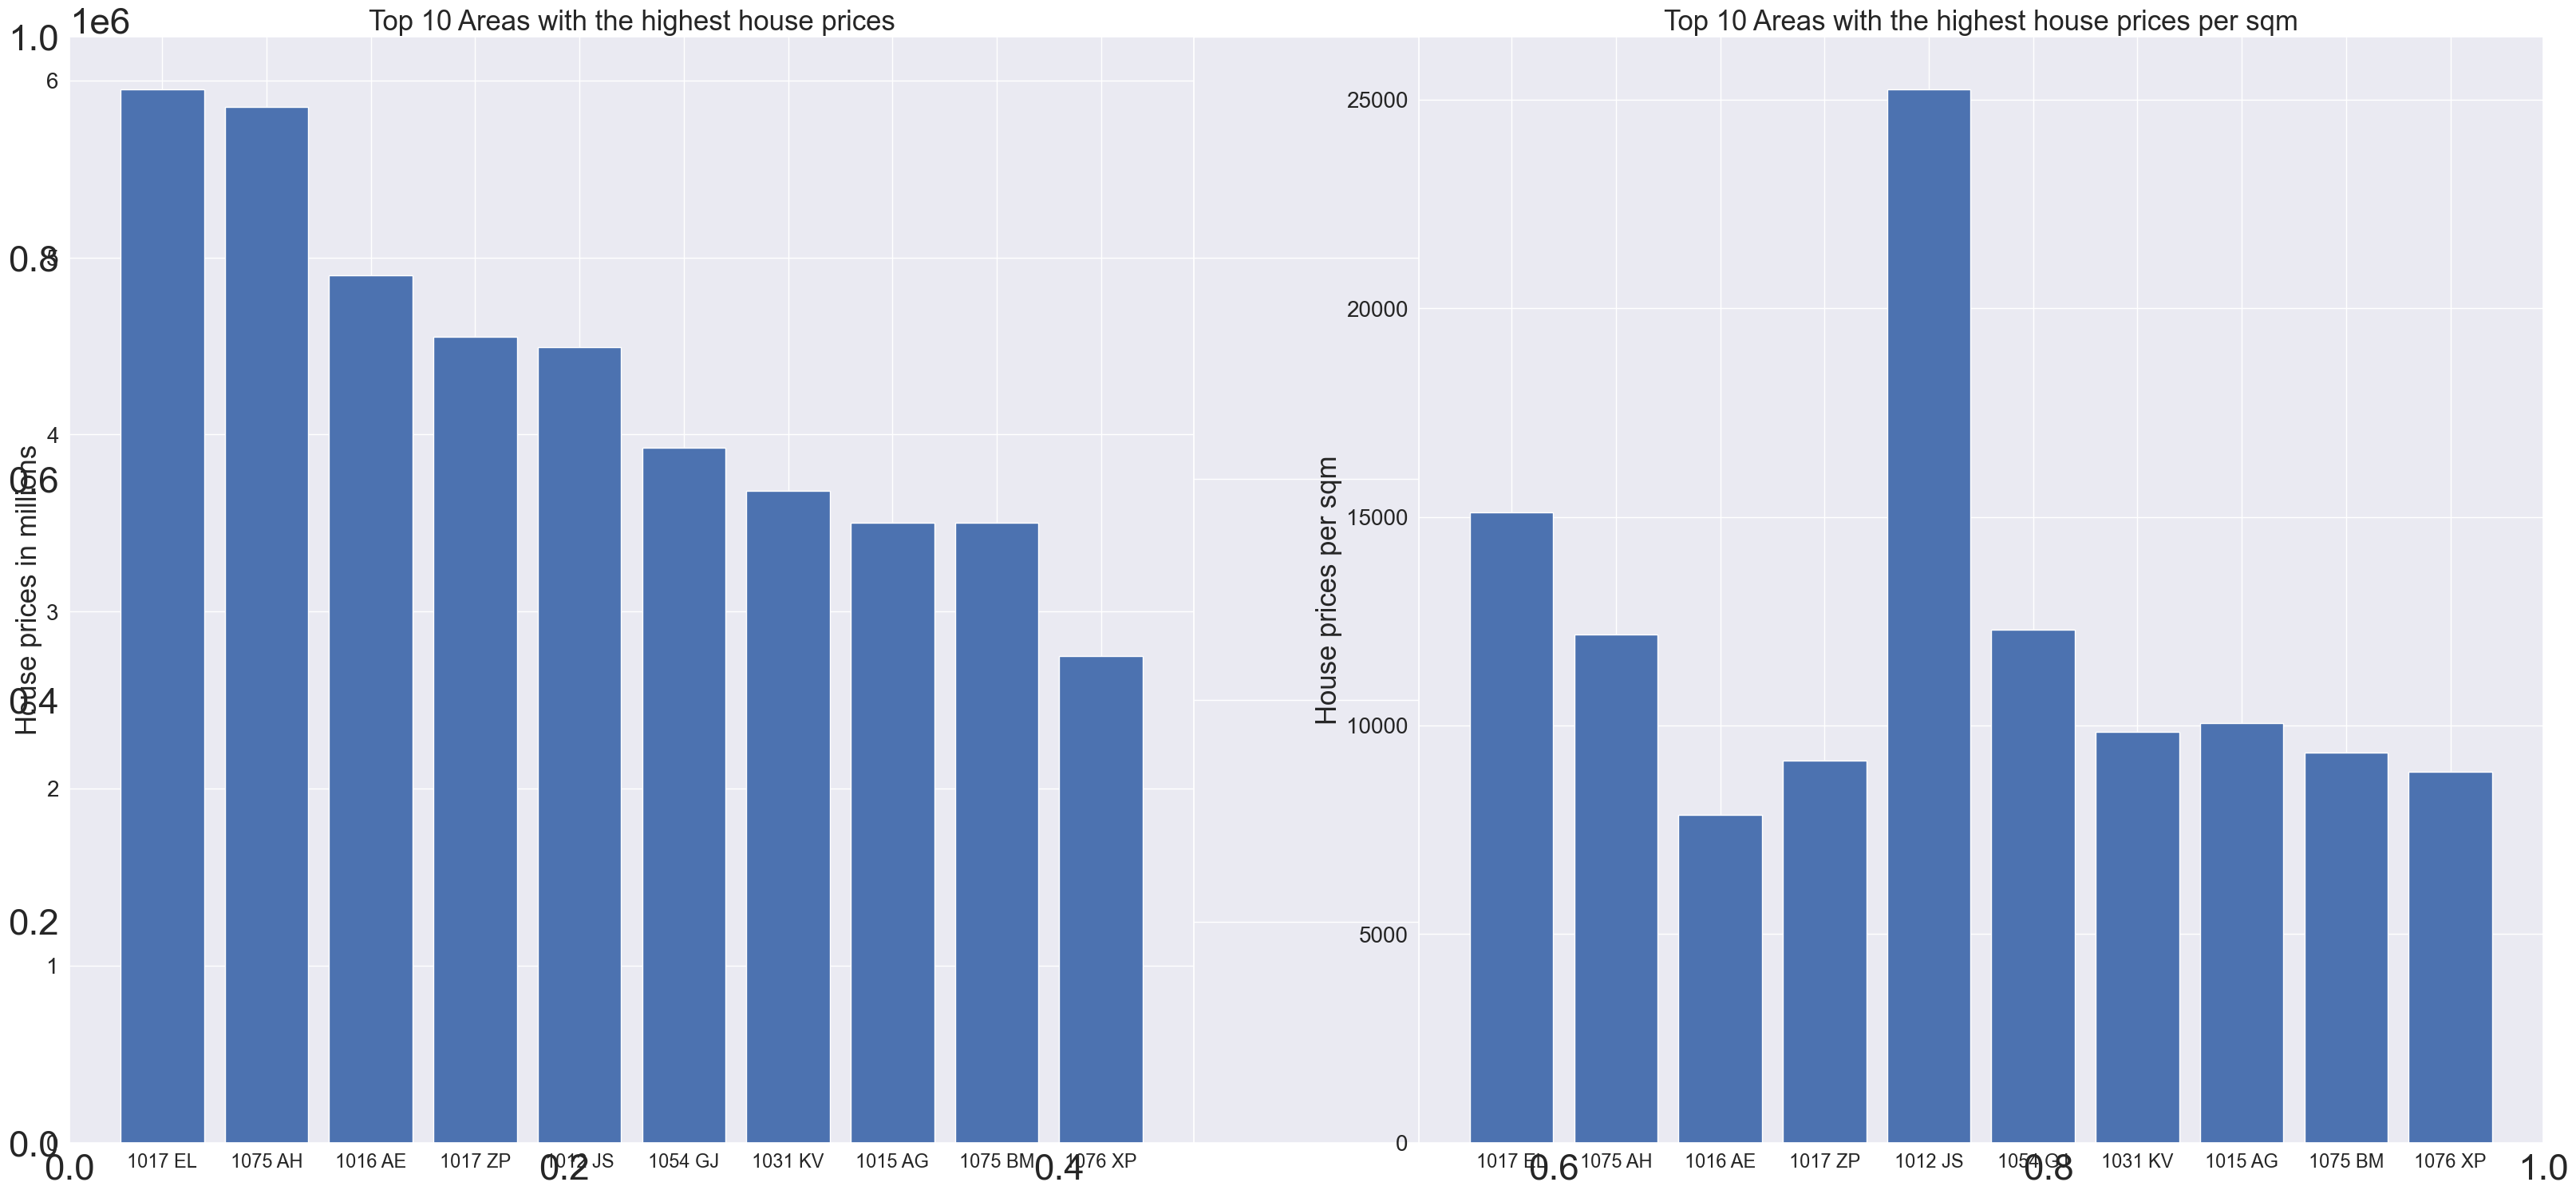

In [24]:
fig, ax = plt.subplots(figsize=(40,18))
x = houseprices_sorted['Zip'][0:10]
y = houseprices_sorted['Price'][0:10]
y1 = houseprices_sorted['PriceperSqm'][0:10]
plt.subplot(1,2,1)
plt.bar(x,y)
plt.xticks(fontsize=17)
plt.ylabel('House prices in millions', fontsize=25)
plt.yticks(fontsize=20)
plt.title('Top 10 Areas with the highest house prices',fontsize=25)

plt.subplot(1,2,2)
plt.bar(x,y1)
plt.xticks(fontsize=17)
plt.ylabel('House prices per sqm', fontsize=25)
plt.yticks(fontsize=20)
plt.title('Top 10 Areas with the highest house prices per sqm',
fontsize=25)
plt.show()

## 3. Trực quan hóa dữ liệu với thư viện Seaborn

### Case 1: Cơ bản

<Axes: xlabel='Zip', ylabel='Price'>

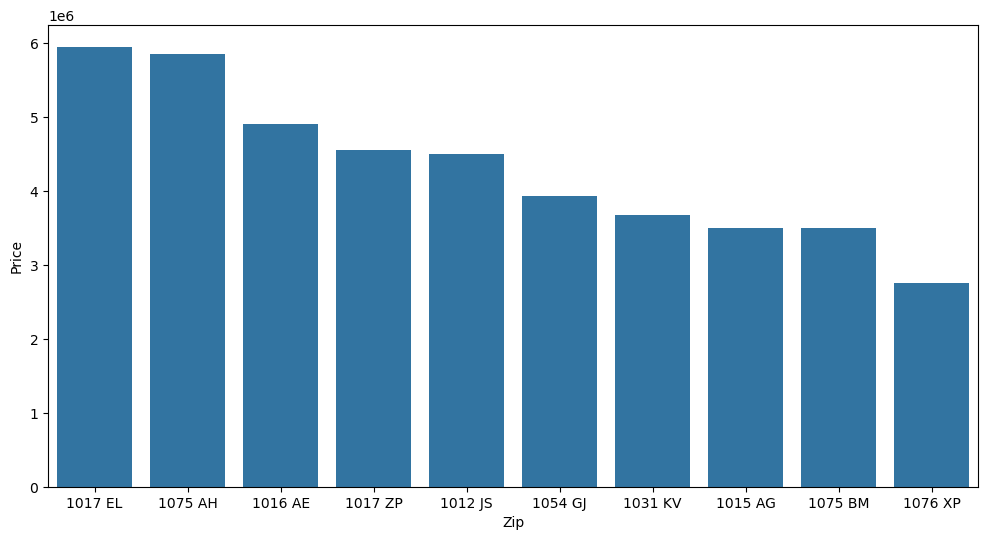

In [20]:
plt.figure(figsize= (12,6))
data = houseprices_sorted[0:10]
sns.barplot(data= data, x= 'Zip',y = 'Price')

### Case 2: Thêm nhãn, tiêu đề

Text(0.5, 1.0, 'Top 10 Areas with the highest house prices')

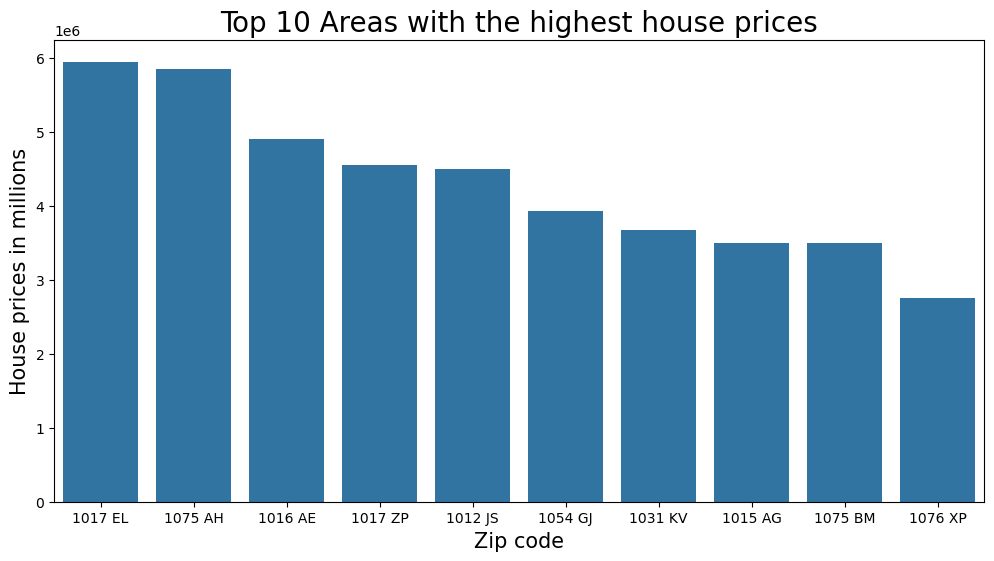

In [21]:
plt.figure(figsize= (12,6))
data = houseprices_sorted[0:10]
ax = sns.barplot(data= data, x= 'Zip',y = 'Price')
ax.set_xlabel('Zip code',fontsize = 15)
ax.set_ylabel('House prices in millions', fontsize = 15)
ax.set_title('Top 10 Areas with the highest house prices', fontsize= 20)

### Case 3: So sánh Price và PriceperSqm

Text(0.5, 1.0, 'Top 10 Areas with the highest price per sqm')

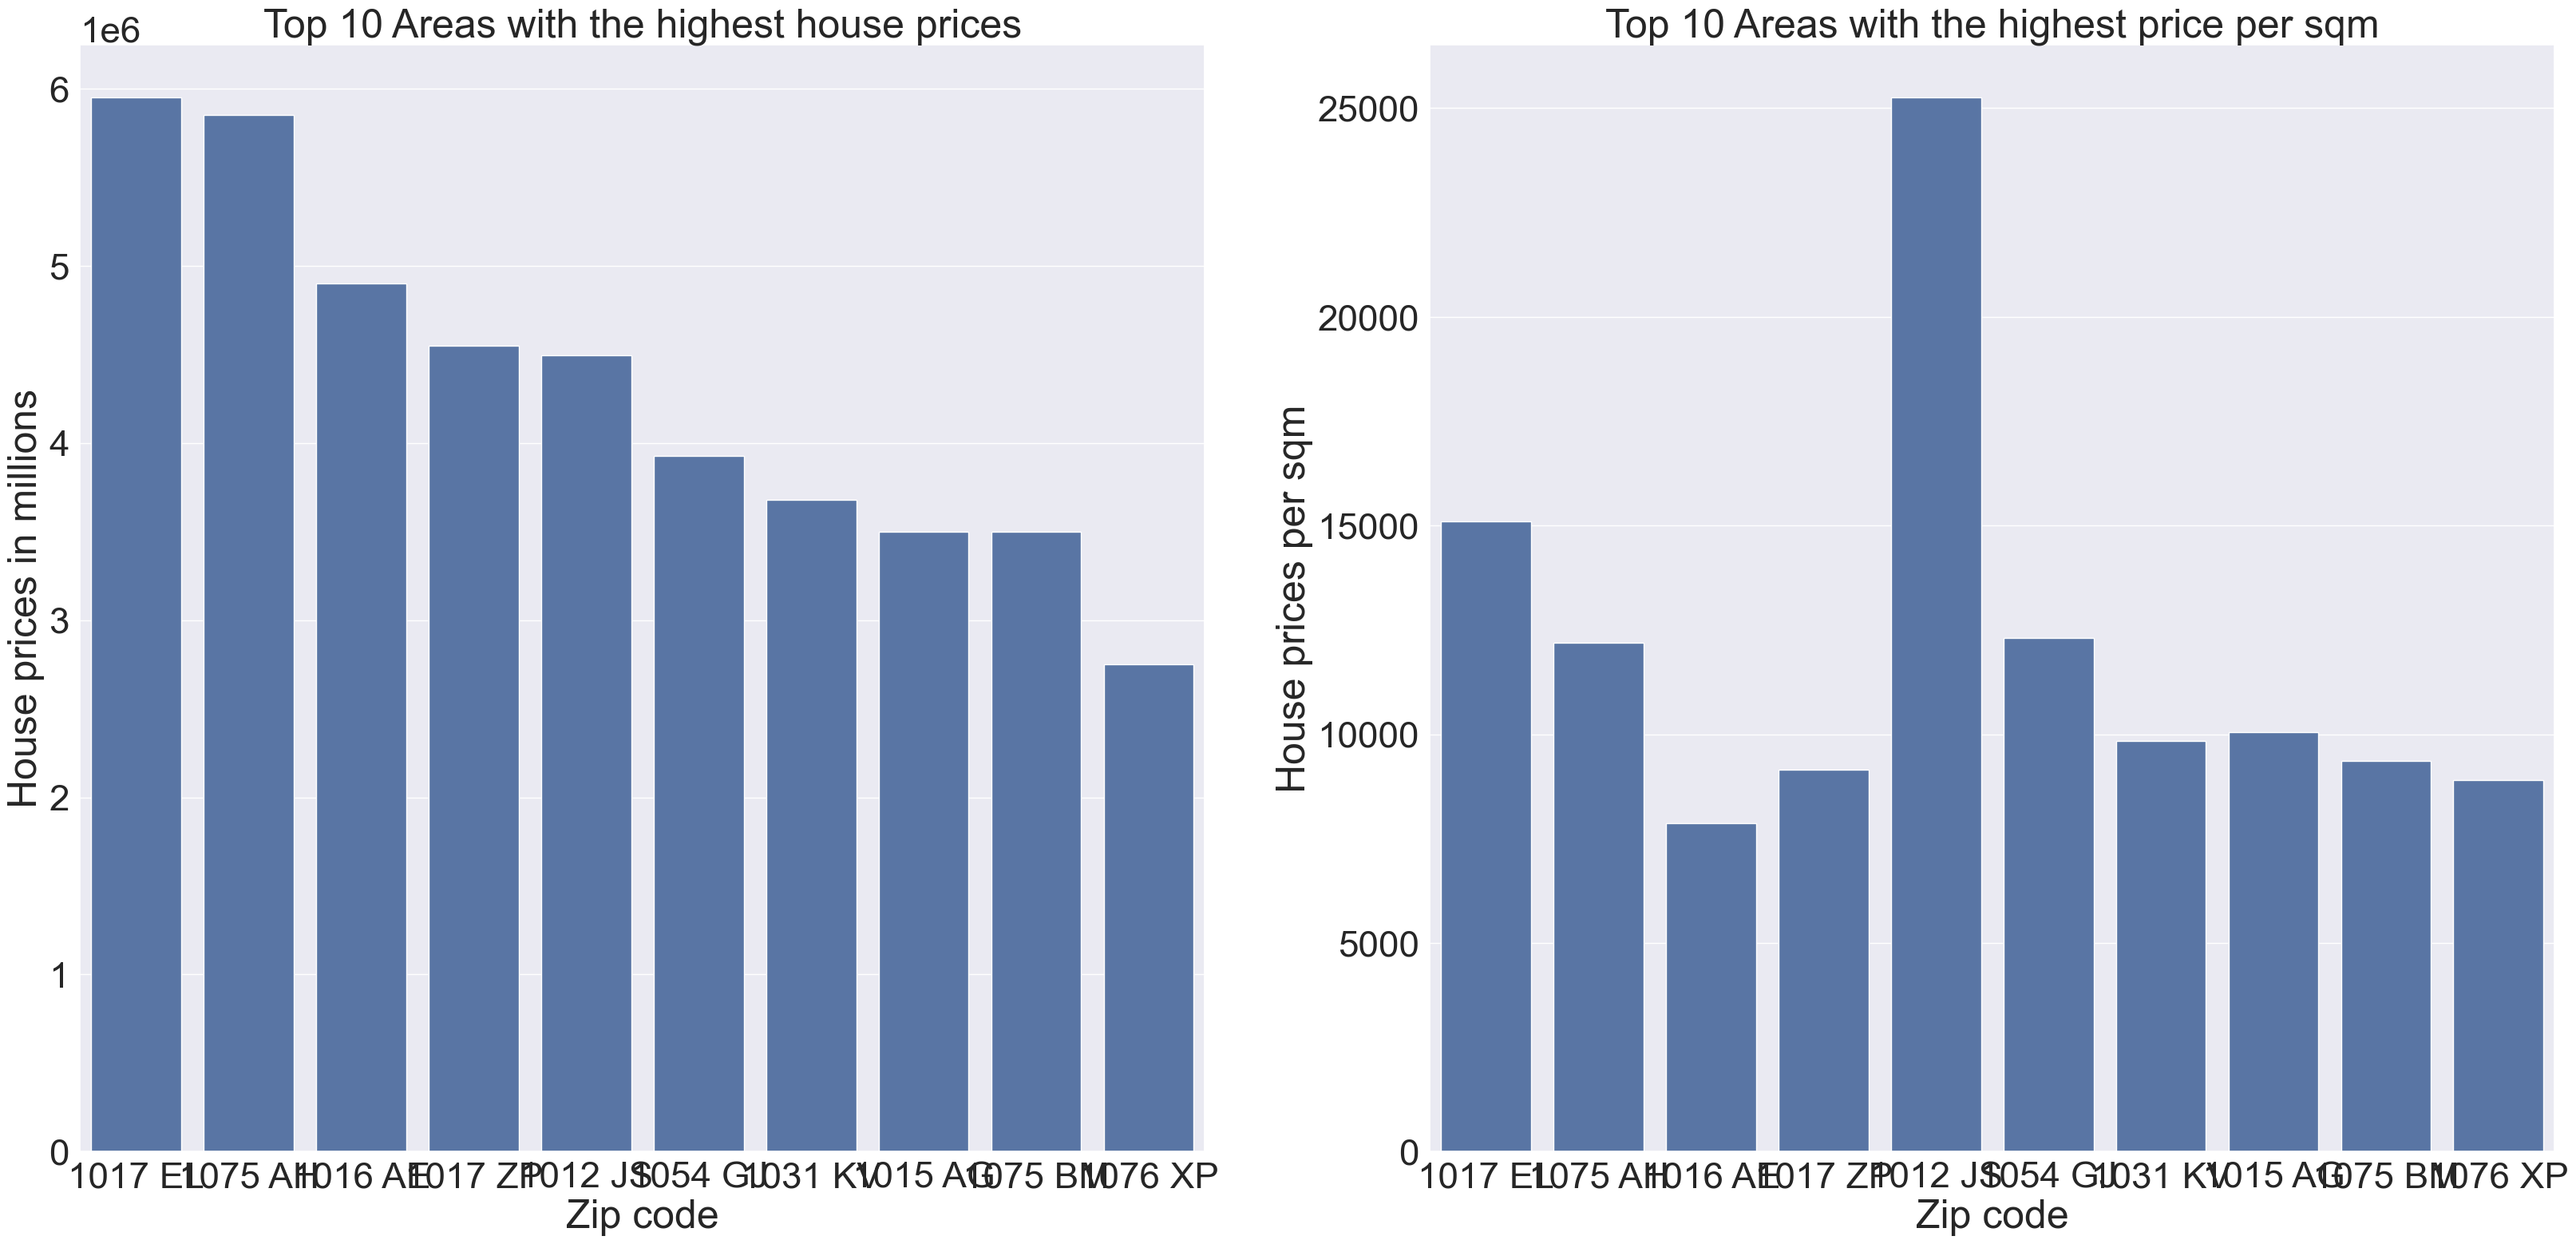

In [23]:
fig, ax = plt.subplots(1, 2,figsize=(40,18))
data = houseprices_sorted[0:10]
sns.set(font_scale = 3)
ax1 = sns.barplot(data= data, x= 'Zip',y = 'Price', ax = ax[0])
ax1.set_xlabel('Zip code')
ax1.set_ylabel('House prices in millions')
ax1.set_title('Top 10 Areas with the highest house prices')
ax2 = sns.barplot(data= data, x= 'Zip',y = 'PriceperSqm',ax=ax[1])

ax2.set_xlabel('Zip code')
ax2.set_ylabel('House prices per sqm')
ax2.set_title('Top 10 Areas with the highest price per sqm')